In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Определение функции ошибки

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

# Определение функции стандартизации признаков

In [3]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

# Инициализация исходных данных

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
X_std = X.copy().astype(np.float64)
X_std[:, 1:4] = standard_scale(X[:, 1:4])

# 1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

## Определение функции градиентного спуска с L1 регуляризацией

In [6]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    w_list = [W.copy()]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # Пересчитали производную осталась только константа
        W -= eta * (dQ + dReg) 
        
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [7]:
gradient_descent_reg_l1(X_std, y, iterations=5000, eta=1e-2, reg=1e-2);

Iter: 0, weights: [ 1.48079695  1.29567141 -1.43203884  1.05756877], error 3305.3489090728494
Iter: 500, weights: [56.4927431   6.06473421  0.59761581  5.81715241], error 25.062627077195266
Iter: 1000, weights: [ 5.64949999e+01  6.22753850e+00 -1.34907497e-02  6.28988630e+00], error 24.92540418133861
Iter: 1500, weights: [56.495       6.26182427 -0.1943272   6.44326074], error 24.909207584365113
Iter: 2000, weights: [56.495       6.2752283  -0.25992738  6.49758233], error 24.906252698925094
Iter: 2500, weights: [56.495       6.28011385 -0.28355873  6.51709649], error 24.905561666541914
Iter: 3000, weights: [56.495       6.28187548 -0.29206562  6.52411847], error 24.905361234443358
Iter: 3500, weights: [56.495       6.28250972 -0.29512765  6.52664588], error 24.90529534981646
Iter: 4000, weights: [56.495       6.28273802 -0.2962298   6.52755559], error 24.90527244621782
Iter: 4500, weights: [56.495       6.28282019 -0.29662652  6.52788303], error 24.905264307338783
Final MSE: 24.9052613

# 2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Как нормализация, так и стандартизация это обратимые преобразования, так что применить можно, но вряд ли имеет практический смысл. Может быть если сначала провести стандартизацию, а вторым шагом нормализовать, то в некоторых случаях будет разве что картинка красивее.

# 3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

## Генерация исходных данных

In [8]:
X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

## Стандартизация признаков

In [9]:
X = standard_scale(X)

## Воспользуемя функцией градиентного спуска с L1 регуляризацией определённой в задании 1.

In [10]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent_reg_l1(X, Y, iterations=5000, eta=1e-3, reg=1e-2)

Iter: 0, weights: [-0.14953844  0.91024322  0.20184121 -0.38987101 -0.74488261 -0.80776399
 -1.10385808  0.81512209  0.4684833   1.14336966 -0.18526869  0.41489552
  0.03187727  0.89481226 -0.43916913  0.82881742  0.28766449  1.02843925
 -0.20531947 -0.95162897], error 28093.95344187222
Iter: 500, weights: [ 4.75260627e+00  6.47059846e+00  8.04969011e-02  6.00020519e-02
 -2.63857994e-01  4.97349393e+01 -2.81230217e-01  6.92712652e-01
  6.11731405e+01  3.81428048e+01 -5.28437071e-02  2.13983877e+01
  2.38627391e+01  1.48925435e-01 -5.07883291e-01  2.16344259e-01
  1.37040584e-01  1.79185502e+01 -2.95550984e-01  4.63449366e+01], error 3755.412417708711
Iter: 1000, weights: [ 6.72496829e+00  8.49944197e+00  3.51892301e-02  9.17786423e-02
 -9.15272553e-02  6.81045692e+01 -6.27738672e-02  3.86815095e-01
  8.32736344e+01  5.16888910e+01 -8.50143579e-03  2.89125324e+01
  3.24420451e+01  1.14541750e-02 -3.27547453e-01  3.55878024e-02
  5.08337454e-02  2.41726696e+01 -1.93753719e-01  6.36843256

## Определение функции стахостического градиентного спуска(SGD) с L1 регуляризацией

In [11]:
def stohastic_gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    w_list = [W.copy()]
    
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)
        
        y_pred = np.dot(X[train_ind], W)
        err = calc_mse(y, np.dot(X, W))
        errors.append(err)
        
        dQ = 2/y[train_ind].shape[0] * X[train_ind].T @ (y_pred - y[train_ind]) # градиент функции ошибки
        dReg = reg * np.sign(W) # Пересчитали производную осталась только константа
        W -= eta * (dQ + dReg) 
        
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [12]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent_reg_l1(X, Y, iterations=5000, eta=1e-3, reg=1e-2)

Iter: 0, weights: [ 1.18000725 -0.16992427 -0.68629154 -1.38542566 -0.35647005  0.24403087
  0.70822335 -0.54357625  0.95716786 -1.04381113  0.53705505  0.07896532
  0.44181463  0.99551051 -0.43441004  1.7422245  -0.44496936 -0.44222161
  0.82284622  0.62579121], error 27850.498779625945
Iter: 500, weights: [ 5.59878481  5.66628158 -1.12934725 -0.25824535  3.07341999 45.57706836
  0.25577262  2.27962097 62.82613908 32.73343657  0.06740329 16.48770697
 21.11419014  0.15413665 -3.35918576 -2.3901866  -5.46658696 14.30132673
 -1.45839428 47.53486426], error 4454.719704534855
Iter: 1000, weights: [ 7.185007    7.2861831   2.33126908 -0.51369351  2.01627457 66.55176498
 -0.12036517  2.39812499 84.65878257 51.10892999 -1.07361879 27.52926352
 30.88753758 -1.06236451 -2.88762913  1.75546121 -1.29842563 22.7772422
 -1.38482451 63.97545514], error 603.5274943967446
Iter: 1500, weights: [ 7.69905133e+00  8.90397992e+00  1.03971560e+00  4.03066075e-01
  1.14287389e-01  7.43858772e+01 -1.93225065e

## Визуализация изменения функционала ошибки

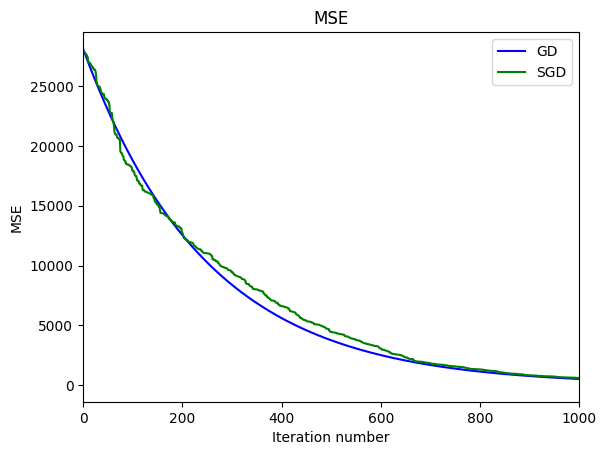

In [13]:
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [14]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

## Визуализируем изменение весов

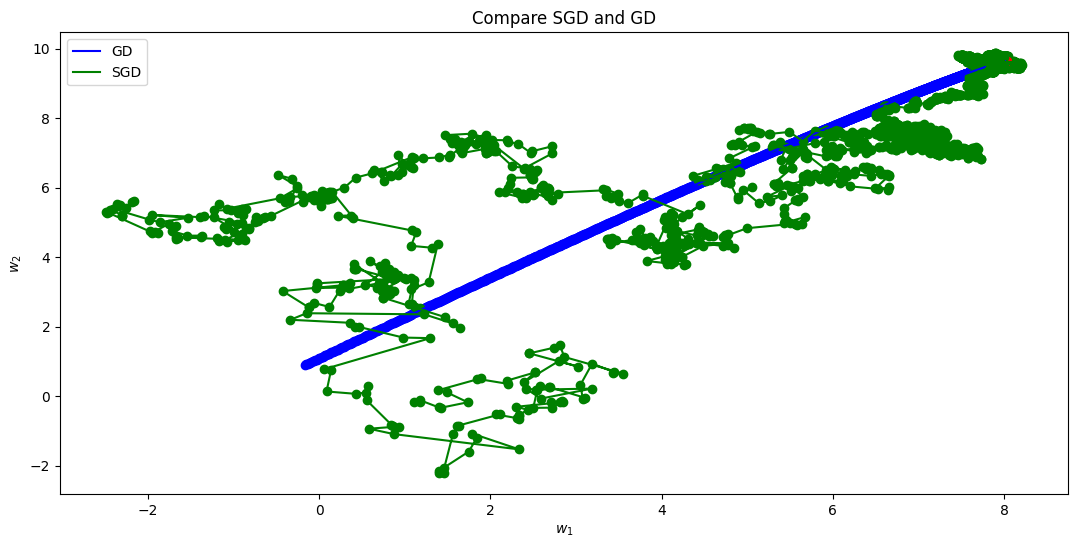

In [15]:
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()

## Вывод: SGD работает быстрее при меньшем потреблении памяти  при сравнимой точности